# Figure 11. Relative distance distributions (all set sizes)

### Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data import load_data
from utils import get_relative_dist_df, get_kl_df
from vis import DISC_EDGES, FREE_COLOR, RAND_COLOR, set_axes_labels, set_export_style, set_axes_aspect, set_axes_rad, plot_paired_relative_distance

save_fig = False

### Load data

In [2]:
### DATASET LOADING ###
modality = 'color'
set_size = 6 # for response plotting

# continuous datasets
df_free_cont = load_data(modality=modality, condition='free', dataset='continuous')
df_free_cont_6 = df_free_cont[df_free_cont.set_size == set_size].reset_index(drop=True)

df_rand_cont = load_data(modality=modality, condition='rand', dataset='continuous')
df_rand_cont_6 = df_rand_cont[df_rand_cont.set_size == set_size].reset_index(drop=True)

# discrete datasets
df_free_disc = load_data(modality=modality, condition='free', dataset='discrete')
df_free_disc_6 = df_free_disc[df_free_disc.set_size == set_size].reset_index(drop=True)

df_rand_disc = load_data(modality=modality, condition='rand', dataset='discrete')
df_rand_disc_6 = df_rand_disc[df_rand_disc.set_size == set_size].reset_index(drop=True)

### Figure 11A. Continuous relative distance distributions

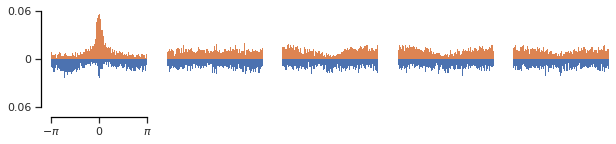

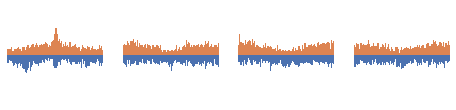

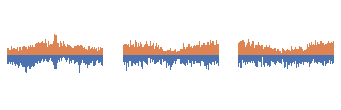

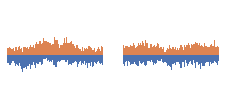

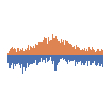

In [4]:
# continuous relative dists (all comparisons)
data_upper = df_free_cont_6
data_lower = df_rand_cont_6

for response in range(1, set_size):

    fig, axes = plot_paired_relative_distance(data_upper, data_lower,
                                              ref_response=response,
                                              truncate_comparisons=True)

    for ax in axes[1:]:
        ax.set_ylim([-0.06, 0.06])
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    axes[0].spines['right'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['left'].set_position(('outward',10))
    axes[0].spines['bottom'].set_position(('outward',10))
    axes[0].set_ylim([-0.06, 0.06])
    axes[0].set_yticks([-0.06, 0, 0.06])
    axes[0].set_yticklabels([0.06, 0, 0.06])
    
    set_axes_aspect(fig, axes)
    set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))

    if save_fig:
        filename = f'../figures/fig_S04_relative_dists_cont_{response}.png'
        plt.savefig(filename, bbox_inches='tight', dpi=800)

### Figure 10B. Discrete relative distance distributions

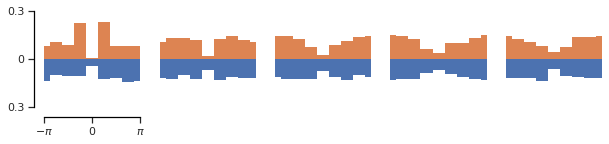

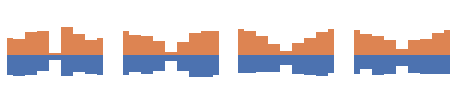

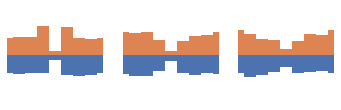

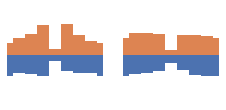

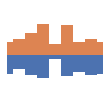

In [7]:
# discrete relative dists (all comparisons)
data_upper = df_free_disc_6
data_lower = df_rand_disc_6

for response in range(1, set_size):

    fig, axes = plot_paired_relative_distance(data_upper, data_lower,
                                              ref_response=response,
                                              bins=DISC_EDGES, 
                                              split_pi=True, 
                                              histtype='stepfilled',
                                              truncate_comparisons=True)

    for ax in axes[1:]:
        ax.set_ylim([-0.3, 0.3])
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    axes[0].spines['right'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['left'].set_position(('outward',10))
    axes[0].spines['bottom'].set_position(('outward',10))
    axes[0].set_ylim([-0.3, 0.3])
    axes[0].set_yticks([-0.3, 0, 0.3])
    axes[0].set_yticklabels([0.3, 0, 0.3])
    

    set_axes_aspect(fig, axes)
    set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))

    if save_fig:
        filename = f'../figures/fig_S04_relative_dists_disc_{response}.png'
        plt.savefig(filename, bbox_inches='tight', dpi=800)